# AI and ML - Homework 

In [9]:
# imports
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Generate training samples
N = 10 # Number of training samples
# Generate equispaced floats in the interval [0, 2π]
x = np.linspace(0, 2*np.pi, N)
# Generate noise
mean = 0
std = 0.05
# Generate some numbers from the sine function
y = np.sin(x)
# Add noise
y += np.random.normal(mean, std, N)

# put column with ones for bias
x_train = np.array([np.ones(N), x])
# swap axes changes the above 2xN matrix to Nx2 matrix
x_train = np.swapaxes(x_train, 0,1)
print(x_train.shape)

(10, 2)


In [18]:
# Generate test inputs
N_test = 100
x_test = np.linspace(0,2*np.pi, N_test)
test_mean = 0
test_std = 0.05
x_test += np.random.normal(test_mean, test_std, N_test)
y_test = np.sin(x_test)
# x_test = np.array([np.ones(N_test), x_test])
# x_test = np.swapaxes(x_test, 0,1)
# print(x_test.shape)

### Vanilla Linear Regression
model: y = w1*x + w0

In [12]:
def get_weights(X, y):
    w = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X),X)), np.transpose(X)), y)
    return w

In [20]:
w = get_weights(x_train, y)
y_predicted = w[0] + w[1]*x_test   # y=mx+c
inv_beta = np.dot(np.transpose(y_test - y_predicted), (y_test - y_predicted)) / N_test
beta = 1/inv_beta
print(beta)

4.248207651014035


In [25]:
y_hat = np.random.normal(y_test, inv_beta, N_test)

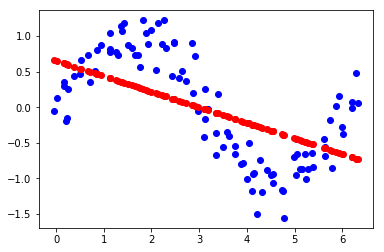

In [26]:
# plotting
plt.plot(x_test,y_hat,'bo')
plt.plot(x_test, y_predicted, 'ro')
plt.show()

###  Linear Regression using polynomial basis Function

In [ ]:
def polynomial(X, _M):
    _phi_x = np.ones(len(X))
    for i in range(1, _M+1):
        _phi_x = np.c_[_phi_x, X**i]
    return _phi_x

In [ ]:
M = 3
x_train = polynomial(x, M)
# print(x_train.shape)
w1 = get_weights(x_train,y)
# print(w1)

y_predict = np.dot(polynomial(x_test, M), w1)
# plotting
plt.plot(x,y,'bo')
plt.plot(x_test, y_predict, 'ro')
plt.show() 